# 放射熱伝達

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
import nbimporter
import Functions as F
import Modules as M

Importing Jupyter notebook from Functions.ipynb
Importing Jupyter notebook from Modules.ipynb


1cm厚のせっこうボード2枚の間の放射熱伝達の計算
1枚は10度、もう1枚は20度で始め、放射熱伝達以外の伝達がないとする。

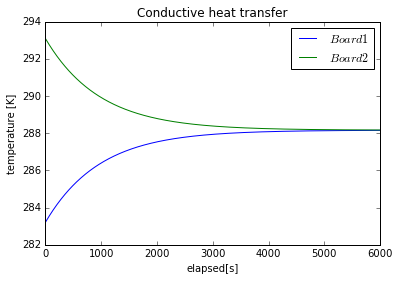

In [2]:
#計算単位時間 dt[s]
dt = 10

#厚み1cm、表面積1m2 せっこうボード
board1 = M.HeatCapacityModule(1 * 0.01, 854, 10+273.15)
board2 = M.HeatCapacityModule(1 * 0.01, 854, 20+273.15)

#形態係数1 放射率0.9
sb = M.RadiativeHeatTransferModule(1.0, board1.T, board2.T, 0.9, 0.9, dt)
board1.HeatIn.append(sb.HeatOut1)
board2.HeatIn.append(sb.HeatOut2)

container = M.ContainerModule()
container.Modules.extend([board1, board2, sb])

data = []
for i in range(60*10):
    container.commit(i)
    data.append((i*dt, board1.T(i), board2.T(i)))

#表示
x = [x[0] for x in data]
plt.title("Conductive heat transfer")
plt.plot(x, [y[1] for y in data], label="$Board1$")
plt.plot(x, [y[2] for y in data], label="$Board2$")
#plt.ylim(9,41)
plt.xlabel("elapsed[s]")
plt.ylabel("temperature [K]")
plt.legend(loc="upper right", ncol=1)

plt.show()